2025-11-10 02:44:03.031998: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 02:44:03.096976: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-10 02:44:05.379814: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Train shape: (50000, 3073)
Test shape: (10000, 3073)


2025-11-10 02:44:41.228754: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-11-10 02:44:47.966333: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 552960000 exceeds 10% of free system memory.


704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.3184 - loss: 1.8877 - val_accuracy: 0.3778 - val_loss: 1.7491
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.3946 - loss: 1.6828 - val_accuracy: 0.3910 - val_loss: 1.6884
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4277 - loss: 1.5877 - val_accuracy: 0.4048 - val_loss: 1.6747
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4496 - loss: 1.5305 - val_accuracy: 0.4498 - val_loss: 1.5312
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4655 - loss: 1.4807 - val_accuracy: 0.4358 - val_loss: 1.6102
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4810 - loss: 1.4472 - val_accuracy: 0.4442 - val_loss: 1.5500
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4958 - loss: 1.4106 - val_accuracy: 0.4554 - val_loss: 1.5048
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5020 - loss: 1.3838 - val_accurac

2025-11-10 02:49:17.080112: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5013 - loss: 1.4260

Test Accuracy: 0.5012999773025513
Test Loss: 1.4259999990463257


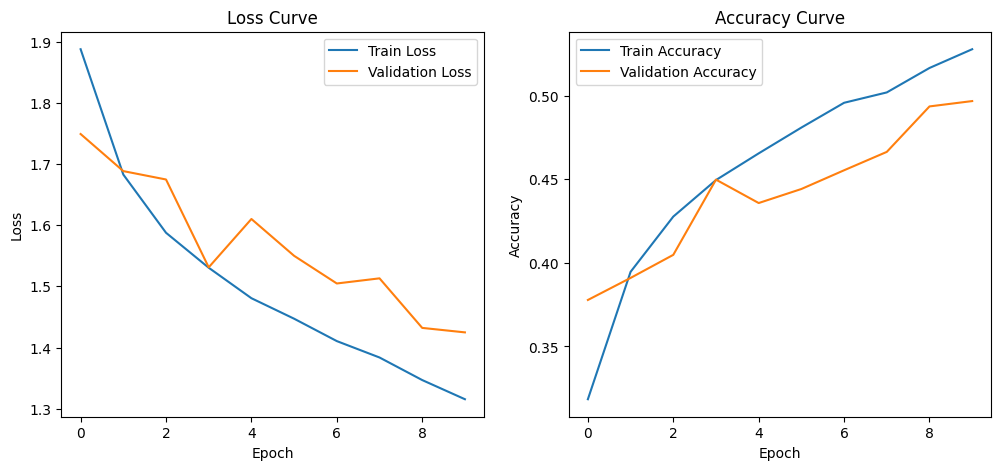

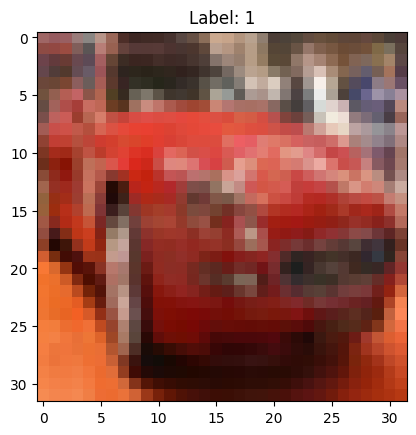

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


train_path = "/home/ayush/Desktop/lp4/dataset/train_data.csv"
test_path  = "/home/ayush/Desktop/lp4/dataset/test_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# label is LAST column
y_train = train_df.iloc[:, -1].values
x_train = train_df.iloc[:, :-1].values

y_test = test_df.iloc[:, -1].values
x_test = test_df.iloc[:, :-1].values

# Normalize pixels
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


# Flattened image dimension
input_dim = 32 * 32 * 3

model = models.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# d. Train the model

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    shuffle=True
)



# e. Evaluate model

test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)


# f. Plot Loss and Accuracy

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


# sample image
img = x_train[5].reshape(32, 32, 3)
plt.imshow(img)
plt.title(f"Label: {y_train[5]}")
plt.show()